## 0. 분석 과정 및 절차
- 분석 목적과 변수 확인 : 개별 변수 이름과 특성 확인
- 데이터의 문제성 확인 : 결측치, 이상치 유무 확인, 분포상의 이상 형태(Head/Tail 확인)
- 데이터의 개별 속성값 분포 확인 : 기초통계량을 통해 데이터가 예상 범위와 분포를 가지는지 확인
- 데이터 사이의 관계 확인 : 상관관계 등 확인
> info => 결측/이상치, head/tail => describe => corr

## 1. 개별 데이터 관찰
- 데이터 값을 눈으로 살펴보며 전체적 추세와 특이사항 관찰 
    - 데이터 앞/뒤 부분 관찰, 무작위 표본 추출 등 사용
    - 분석목적과 변수 파악

## 2. 데이터 문제성 확인
- **결측치, 이상치** 유무 확인 (왜 발생했는가?)
- 대처 방법 판단 
    - 결측치 : 함수, 상관관계 등으로 확인 => 단순대치법, 다중대치법
    - 이상치 : 통계값, 시각화, 머신러닝 기법으로 확인 => 제거, 대체, 유지 등

## 3. 데이터의 개별 속성값 분포 확인
- **통계지표** 사용
    - 중심 : mean, median, mode
    - 분산 : range, variance, standard deviation
- **사분위범위** 사용
- **시각화** : 확률밀도 함수, 히스토그램, 박스플롯, 산점도, 워드클라우드 시계열차트, 지도 등

## 4. 데이터의 속성간 관계 파악
- **상관관계 분석**을 통해 데이터의 속성 간 관계 파악
    - 선형적 관계가 있는지 확인
    - 관계 없으면 독립적인 관계, 관계 있으면 상관된 관계

### 타이타닉 데이터셋

In [3]:
# 타이타닉 데이터셋 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic')

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
# 변수 타입 변환
titanic['survived'] = titanic['survived'].astype(str)
titanic['pclass'] = titanic['pclass'].astype(str)

titanic.info()
# non-null count를 통해 age, embarked, deck, embark_town에 결측치가 있음을 확인 가능

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    object  
 1   pclass       891 non-null    object  
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(2), object(7)
memory usage: 80.7+ KB


In [10]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [14]:
titanic.describe(include='all').T  
# 수치형 변수에 대한 기초통계량 확인 가능
# include = all : 범주형 변수의 unique, top, freq 값

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
survived,891,2,0,549,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pclass,891,3,3,491,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
sibsp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
embarked,889,3,S,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,891,3,Third,491,NaN,NaN,NaN,NaN,NaN,NaN,NaN
who,891,3,man,537,NaN,NaN,NaN,NaN,NaN,NaN,NaN


[pclass] pclass
1    216
2    184
3    491
dtype: int64
[sex] <bound method GroupBy.size of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x000001D344846B30>>
[female] survived
0     81
1    233
dtype: int64
[male] survived
0    468
1    109
dtype: int64


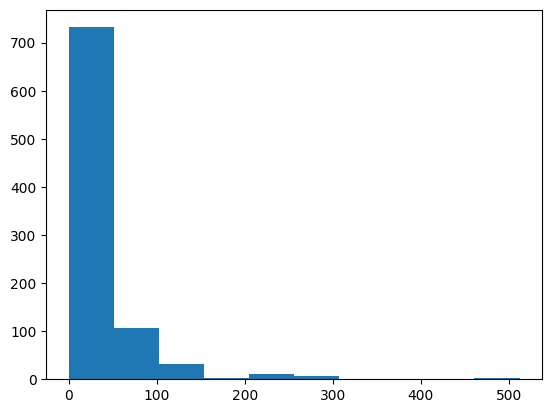

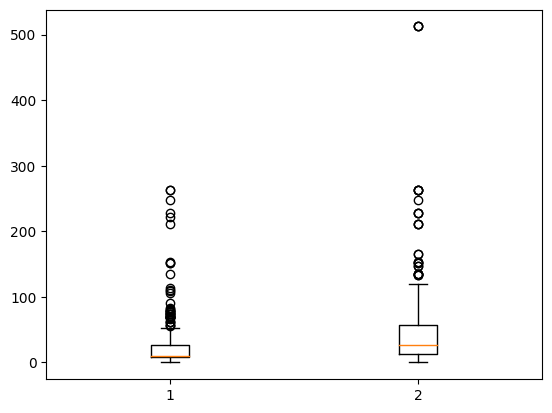

In [22]:
# 기초 데이터 분석
## groupby(), size() 이용 pclass 빈도수 구하기
print('[pclass]', titanic.groupby('pclass').size())  # pclass

## histogram 
plt.hist(titanic['fare']);                         # fare - 이상치 존재함
## 데이터 분리
data0 = titanic[titanic['survived']=='0']['fare']  # 사망자 요금 데이터
data1 = titanic[titanic['survived']=='1']['fare']  # 생존자 요금 데이터
fig, ax = plt.subplots()
ax.boxplot([data0, data1]);

## 빈도수 계산
print('[sex]', titanic.groupby('sex').size)         # sex
data0 = titanic[titanic['sex']=='female']['survived']  # 여성 생존 수
print('[female]', pd.DataFrame(data0).groupby('survived').size())
data1 = titanic[titanic['sex']=='male']['survived']  # 남성 생존 수
print('[male]', pd.DataFrame(data1).groupby('survived').size())

# 02. 데이터 전처리 개요

## 1. 결측치 처리
- 결측치 행 모두 버림
- 적절한 값으로 대체 (평균값, 인접값, 최빈값 등)
- NaN으로 표시 후 다음 분석단계로 넘김

**1. 결측치 확인 : isnull()**
- 결측치인 경우 True 반환, 아닌 경우 False 반환

In [60]:
titanic.isnull().sum()
# 타이타닉 데이터셋은 결측치가 존재함 

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

**2. 결측치 행 제거 : dropna()**
- axis=0 : 결측치가 있는 모든 행 삭제
- axis=1 : 결측치가 있는 모든 열 삭제
- subser=['컬럼명'], axis=0 : 해당 컬럼의 결측치가 있는 모든 행 삭제

In [64]:
titanic_1 = titanic.dropna()
print(titanic_1.isnull().sum().sum())  # 데이터프레임 결측치 전체
titanic_1.shape, titanic.shape

0


((182, 15), (891, 15))

**3. 결측치 대체 : fillna()** - 평균, 최빈값, 최대, 최소 등 <br>
- method='ffill' : 결측치 행 직전 행에 있는 값으로 대체
- method='bfill' : 결측치 행 다음 행에 있는 값으로 대체
- groupby() 함수를 활용해 그룹별 평균값을 구하고 대체할 수 있음

In [67]:
print('age 기존 결측치 수', titanic['age'].isnull().sum())

age_mean = titanic['age'].mean()
titanic['age'].fillna(age_mean, inplace=True)
print('결측치 대체 후 결측치 수', titanic['age'].isnull().sum())

age 기존 결측치 수 0
결측치 대체 후 결측치 수 0


In [71]:
from scipy.stats import mode

print('embarked 기존 결측치 수', titanic['embark_town'].isnull().sum())

embarked_mode = titanic['embark_town'].mode()
titanic['embark_town'].fillna(embarked_mode[0], inplace=True)
print('embarked 결측치 대체 후 결측치 수', titanic['embark_town'].isnull().sum())

embarked 기존 결측치 수 2
embarked 결측치 대체 후 결측치 수 0


In [78]:
# groupby() 함수를 활용해 그룹별 평균값을 구하고 대체
titanic['age'].fillna(titanic.groupby('pclass')['age'].transform('mean'), inplace=True)
                            # pclass별 그루핑, age 컬럼에 mean 함수 적용
                            # transform() 함수 : 판다스 객체에 주어진 함수를 적용
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.000000,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.000000,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.000000,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.000000,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


## 2. 틀린(invalid)값 처리
- 모두 버림
- 적절한 값으로 대체
- 분석 단계로 넘김

## 3. 이상치 처리

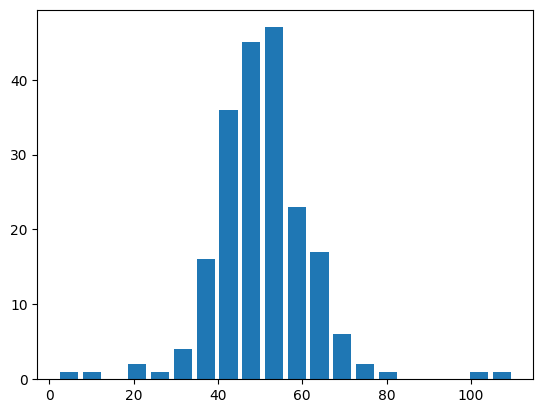

In [80]:
# 데이터 생성
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 정규분포 평균 50, 표준편차 10을 가지는 데이터 200개 생성 -> 데이터프레임으로 변환
data = 10 * np.random.randn(200) + 50
df = pd.DataFrame({"값":data})

# 임의의 이상치 삽입
df.loc[201] = 2
df.loc[202] = 100
df.loc[203] = 10
df.loc[204] = 110

# 시각화
plt.hist(df['값'], bins=20, rwidth=0.8)
plt.show()

**1. IQR 방법**

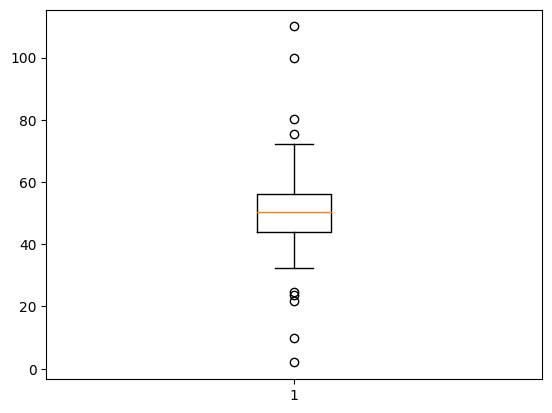

In [81]:
# 박스플롯
plt.boxplot(df['값'])
plt.show()

**quantile()** : 사분위수 구하는 함수

In [84]:
q1 = df['값'].quantile(.25)
q2 = df['값'].quantile(.50)
q3 = df['값'].quantile(.75)
IQR = q3 - q1

print(q1, q2, q3, IQR)

44.05930150525536 50.27432826015109 56.013724414005445 11.954422908750082


In [85]:
# IQR로 이상치 검출
condition = df['값'] > (q3 + IQR*1.5)
upperOutlier = df[condition]

condition2 = df['값'] < (q1 - IQR*1.5)
lowerOutlier = df[condition2]

print(upperOutlier, lowerOutlier)

              값
103   80.382471
131   75.376812
202  100.000000
204  110.000000              값
42   23.569451
158  21.684576
189  24.535578
201   2.000000
203  10.000000


## 4. 데이터 변환
- 수치 데이터를 범주형으로 변환
- 일반 정규화
- z-score 정규화
- 로그 변환 (국가별 수출액 분포 그래프 등, 사람이 느끼는 감각의 경우, 값의 범위가 너무 큰 경우, 숫자의 증가를 곱셈으로 처리하는 것이 편한 경우)
- 역수 변환

### (1) 표준 정규화
- 변수들의 측정단위나 값의 범위가 다를 때 적용

In [24]:
# 데이터 생성
import numpy as np
meat_consumption_korean = 5*np.random.randn(1000) + 53.9
meat_consumption_japan = 4*np.random.randn(1000) + 32.7

meat_consumption = pd.DataFrame({"한국인":meat_consumption_korean, "일본인":meat_consumption_japan})
meat_consumption.head()

,한국인,일본인
0,54.237368,35.412119
1,62.564913,30.353651
2,54.976361,41.031143
3,51.833626,27.075841
4,43.940083,33.728548


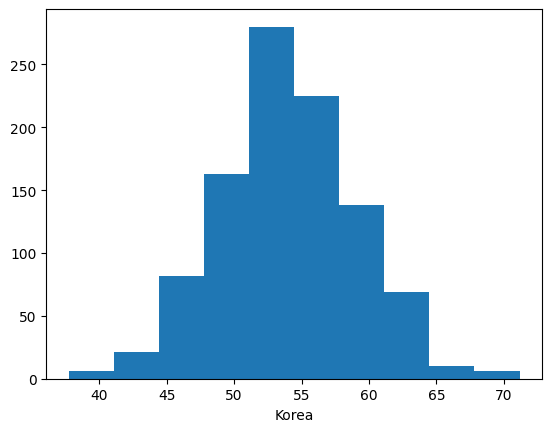

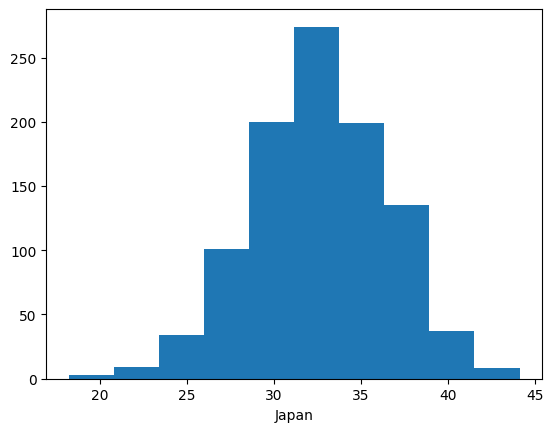

In [26]:
# 히스토그램 시각화
plt.hist(meat_consumption_korean)
plt.xlabel('Korea')
plt.show()

plt.hist(meat_consumption_japan)
plt.xlabel('Japan')
plt.show()

### z-score 표준화

**1. scipy 모듈 사용 표준화** - zscore() 함수 사용

In [28]:
# scipy 모듈 사용 표준화 
import scipy.stats as ss  

meat_consumption['z_score_kor'] = ss.zscore(meat_consumption_korean)
meat_consumption['z_score_jap'] = ss.zscore(meat_consumption_japan)
meat_consumption.head()

,한국인,일본인,z_score_kor,z_score_jap
0,54.237368,35.412119,0.043762,0.707615
1,62.564913,30.353651,1.697242,-0.584828
2,54.976361,41.031143,0.190493,2.143280
3,51.833626,27.075841,-0.433514,-1.422311
4,43.940083,33.728548,-2.000820,0.277461


**2. 직접 계산해서 표준화** - (변수-평균)/표준편차

In [29]:
meat_consumption_korean.mean(), np.mean(meat_consumption_korean)

(54.016964559826256, 54.016964559826256)

In [30]:
meat_consumption['z_kor'] = (meat_consumption_korean - meat_consumption_korean.mean())/meat_consumption_korean.std()
meat_consumption['z_jap'] = (meat_consumption_japan - meat_consumption_japan.mean())/meat_consumption_japan.std()
meat_consumption.head()

,한국인,일본인,z_score_kor,z_score_jap,z_kor,z_jap
0,54.237368,35.412119,0.043762,0.707615,0.043762,0.707615
1,62.564913,30.353651,1.697242,-0.584828,1.697242,-0.584828
2,54.976361,41.031143,0.190493,2.143280,0.190493,2.143280
3,51.833626,27.075841,-0.433514,-1.422311,-0.433514,-1.422311
4,43.940083,33.728548,-2.000820,0.277461,-2.000820,0.277461


**3.scikitlearn scaler 사용 표준화**

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
meat_consumption['z_kor_sklearn'] = scaler.fit_transform(meat_consumption[['한국인']])
meat_consumption['z_jap_sklearn'] = scaler.fit_transform(meat_consumption[['일본인']])
meat_consumption.head()

,한국인,일본인,z_score_kor,z_score_jap,z_kor,z_jap,z_kor_sklearn,z_jap_sklearn
0,54.237368,35.412119,0.043762,0.707615,0.043762,0.707615,0.043762,0.707615
1,62.564913,30.353651,1.697242,-0.584828,1.697242,-0.584828,1.697242,-0.584828
2,54.976361,41.031143,0.190493,2.143280,0.190493,2.143280,0.190493,2.143280
3,51.833626,27.075841,-0.433514,-1.422311,-0.433514,-1.422311,-0.433514,-1.422311
4,43.940083,33.728548,-2.000820,0.277461,-2.000820,0.277461,-2.000820,0.277461


**4. 표준화된 데이터 히스토그램 확인**

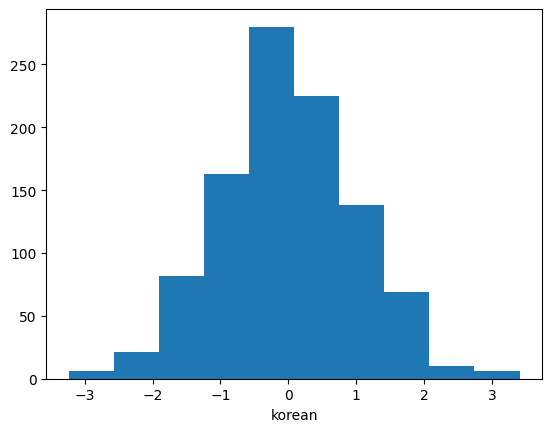

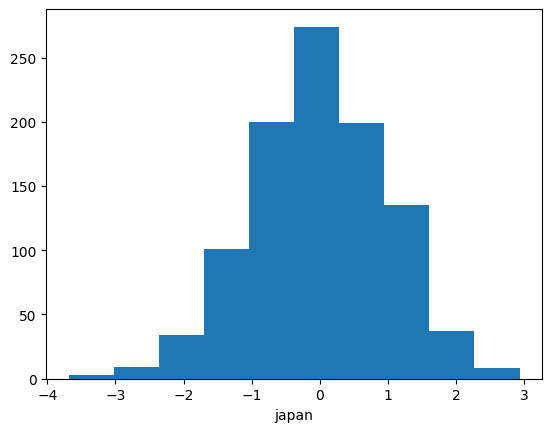

In [32]:
plt.hist(meat_consumption['z_kor'])
plt.xlabel('korean')
plt.show()

plt.hist(meat_consumption['z_jap'])
plt.xlabel('japan')
plt.show()

# -3 ~ 3범위로 바뀜

### Min-Max 표준화
연속형 변수의 값을 0~1 사이의 값으로 변환

**1. MinMaxScaler() 사용 표준화**

In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
meat_consumption['한국인_mm'] = scaler.fit_transform(meat_consumption[['한국인']])
meat_consumption['일본인_mm'] = scaler.fit_transform(meat_consumption[['일본인']])
meat_consumption[['한국인','일본인','한국인_mm','일본인_mm']].head()

,한국인,일본인,한국인_mm,일본인_mm
0,54.237368,35.412119,0.493814,0.663987
1,62.564913,30.353651,0.742781,0.468702
2,54.976361,41.031143,0.515907,0.880913
3,51.833626,27.075841,0.421950,0.342160
4,43.940083,33.728548,0.185958,0.598992


**2. 직접 계산**

In [40]:
Min = meat_consumption[['한국인']].min()
Max = meat_consumption[['한국인']].max()
meat_consumption['한국인_mm2'] = (meat_consumption[['한국인']]-Min)/(Max-Min)

Min = meat_consumption[['일본인']].min()
Max = meat_consumption[['일본인']].max()
meat_consumption['일본인_mm2'] = (meat_consumption[['일본인']]-Min)/(Max-Min)
meat_consumption[['한국인','일본인','한국인_mm','일본인_mm','한국인_mm2','일본인_mm2']].head()

,한국인,일본인,한국인_mm,일본인_mm,한국인_mm2,일본인_mm2
0,54.237368,35.412119,0.493814,0.663987,0.493814,0.663987
1,62.564913,30.353651,0.742781,0.468702,0.742781,0.468702
2,54.976361,41.031143,0.515907,0.880913,0.515907,0.880913
3,51.833626,27.075841,0.421950,0.342160,0.421950,0.342160
4,43.940083,33.728548,0.185958,0.598992,0.185958,0.598992


### (2) 정규분포변환
- 분포의 대칭 척도인 왜도가 0이 아닌 경우 분포가 한쪽으로 치우쳐져 있으며, 이 분포에서는 중심 경향 측정값(평균, 중앙값, 최빈값)이 동일하지 않음
> 왜도 > 0 : 왼쪽으로 치우침 (평균 > 중앙값 > 최빈값)<br>
> 왜도 = 0 : 좌우 대칭 (평균 = 중앙값 = 최빈값)<br>
> 왜도 < 0 : 오른쪽으로 치우침 (평균 < 중앙값 < 최빈값)

In [41]:
# 데이터셋 불러오기
df = pd.read_csv("https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/USJudgeRatings.csv")
df.head()

,rownames,CONT,INTG,DMNR,DILG,CFMG,DECI,PREP,FAMI,ORAL,WRIT,PHYS,RTEN
0,"AARONSON,L.H.",5.7,7.9,7.7,7.3,7.1,7.4,7.1,7.1,7.1,7.0,8.3,7.8
1,"ALEXANDER,J.M.",6.8,8.9,8.8,8.5,7.8,8.1,8.0,8.0,7.8,7.9,8.5,8.7
2,"ARMENTANO,A.J.",7.2,8.1,7.8,7.8,7.5,7.6,7.5,7.5,7.3,7.4,7.9,7.8
3,"BERDON,R.I.",6.8,8.8,8.5,8.8,8.3,8.5,8.7,8.7,8.4,8.5,8.8,8.7
4,"BRACKEN,J.J.",7.3,6.4,4.3,6.5,6.0,6.2,5.7,5.7,5.1,5.3,5.5,4.8


**scipy 패키지 skew() 함수 : 왜도 계산**

In [42]:
import scipy.stats as ss
print(ss.skew(df['CONT']))  # 왜도가 양수. 최빈값 < 중앙값 < 평균
print(ss.skew(df['PHYS']))  # 왜도가 음수. 평균 < 중앙값 < 최빈값

1.0859724796276253
-1.5582154642293153


**1. log() 변환**
- 왜도가 양수인 경우 : log(x)로 변환
- 왜도가 음수인 경우 : log(max(x+1)-x)

In [43]:
# 변수 변환 - 로그 변환
df['CONT1'] = np.log(df['CONT'])
df['PHYS1'] = np.log(np.max(df['PHYS']+1) - df['PHYS'])

# 왜도 계산
print(ss.skew(df['CONT1']))  
print(ss.skew(df['PHYS1']))

0.6555571886692603
0.5824357748750443


**2. log10() 변환**

In [44]:
# 변수 변환 - 로그 변환
df['CONT2'] = np.log10(df['CONT'])
df['PHYS2'] = np.log10(np.max(df['PHYS']+1) - df['PHYS'])

# 왜도 계산
print(ss.skew(df['CONT2']))  
print(ss.skew(df['PHYS2']))

0.6555571886692441
0.582435774875044


정규화 변환의 요령
> - 독립변수 값이 증가함에 따라 종속변수가 더 빠르게 증가하는 상황 : 로그 변환 시도
> - 독립변수 값이 증가함에 따라 종속변수 값이 더 빠르게 감소하는 경우 : 제곱 변환 시도
> - 로그 변환을 사용할 때는 변환 전 모든 값을 양수로 만들기 위해 모든 값에 상수를 추가해야 함

### (3) 범주화(Categorization), 이산형화(Discretization)
- 연속형 변수를 범주형 변수로 변환하는 작업
- 몇 개의 범주로 어떤 기준으로 나눌지 정하는 것이 중요
- 조건문, cut(), qcut() 사용해서 범주화

73.5


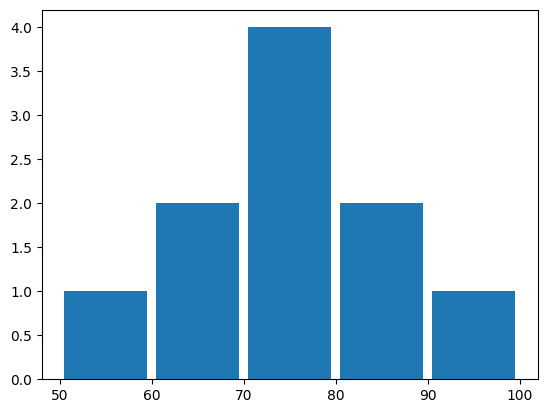

,이름,수학점수
0,철수,52
1,영희,92
2,미영,84
3,시완,71
4,미경,65
5,영환,81
6,숙경,66
7,부영,77
8,민섭,73
9,보연,74


In [46]:
# 예제 데이터 생성
data = [['철수', 52], ['영희', 92], ['미영', 84], ['시완', 71], ['미경', 65],
        ['영환', 81], ['숙경', 66], ['부영', 77], ['민섭', 73], ['보연', 74]]
df = pd.DataFrame(data, columns=['이름', '수학점수'])
print(np.mean(df['수학점수']))

# 히스토그램, 범위 50~100, 5개 구간
plt.hist(df['수학점수'], bins=5, range=[50,100], rwidth=0.9)
plt.show()
df

**1. 조건으로 직접 구간 지정**

In [48]:
df['등급'] = 0  # 등급 컬럼 생성, 0으로 초기화

df.loc[(df['수학점수']<60), '등급'] = 'F'
df.loc[(df['수학점수']>=60) & (df['수학점수']<70), '등급'] = 'D'
df.loc[(df['수학점수']>=70) & (df['수학점수']<80), '등급'] = 'C'
df.loc[(df['수학점수']>=80) & (df['수학점수']<90), '등급'] = 'B'
df.loc[(df['수학점수']>=90) & (df['수학점수']<100), '등급'] = 'A'
df

,이름,수학점수,등급
0,철수,52,F
1,영희,92,A
2,미영,84,B
3,시완,71,C
4,미경,65,D
5,영환,81,B
6,숙경,66,D
7,부영,77,C
8,민섭,73,C
9,보연,74,C


**2. cut() 함수 사용**<br>
pd.cut(x=데이터, bins=경계값 리스트, labels=bin이름, include_lowest=True)
- x : 구간을 나눌 데이터 컬럼 지정
- bins : 경계값 리스트 지정
- labels : 각 구간의 이름을 지정
- include_lowest = True : 각 구간의 낮은 경계값 포함 (왼쪽 경계 포함)

In [52]:
df['등급'] = pd.cut(x=df['수학점수'],
                  bins=[0, 60, 70, 80, 90, 100],
                  labels=['F', 'D', 'C', 'B', 'A'],
                  include_lowest = True)
df

,이름,수학점수,등급
0,철수,52,F
1,영희,92,A
2,미영,84,B
3,시완,71,C
4,미경,65,D
5,영환,81,B
6,숙경,66,D
7,부영,77,C
8,민섭,73,C
9,보연,74,C


**3. qcut() 함수 사용** <br>
- 나누고자 하는 범주 개수를 지정하면 알아서 범주를 나눔
- 동일한 '개수'로 나누고자 할 때 이용

In [53]:
df['등급'] = pd.qcut(x=df['수학점수'],
                  q=5,
                  labels=['F', 'D', 'C', 'B', 'A'])
df

,이름,수학점수,등급
0,철수,52,F
1,영희,92,A
2,미영,84,A
3,시완,71,D
4,미경,65,F
5,영환,81,B
6,숙경,66,D
7,부영,77,B
8,민섭,73,C
9,보연,74,C


## 5. 데이터 축소
- PCA : 기존 데이터의 특징을 대표하는 새로운 값 추출
- 서로 상관성이 높은 여러 변수들의 선형 조합으로 만든 새로운 변수들로 요약, 축소하는 기법

In [54]:
# 데이터 준비
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

iris = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")

**연속형 변수, 범주형 변수 분리**

In [56]:
df = iris.drop(['species'], axis=1)
df_species = iris['species']

df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**PCA 분석 수행**<br>
변수 간의 스케일 차이가 나면 스케일이 큰 변수가 주성분에 영향을 많이 주므로 표준화나 정규화 필요

In [59]:
from sklearn.preprocessing import StandardScaler

# 정규화
scaler = StandardScaler()
df['sepal_length'] = scaler.fit_transform(df[['sepal_length']])
df['sepal_width'] = scaler.fit_transform(df[['sepal_width']])
df['petal_length'] = scaler.fit_transform(df[['petal_length']])
df['petal_width'] = scaler.fit_transform(df[['petal_width']])

# PCA 수행
from sklearn.decomposition import PCA
pca = PCA(n_components=4)  # n_components : 변환할 차원의 수
p_score = pca.fit_transform(df)

print(p_score.shape)
print(pca.explained_variance_ratio_)  # 설명변수 비율

# pca 결과, 첫 번째 요소가 전체 변동성의 73%를 설명함.
# 두 개 요소로만 변환해도 원본 데이터의 변동성을 95.8% 설명 가능하므로, 변수를 원래 4개에서 2개로 줄일 수 있음

(150, 4)
[0.72962445 0.22850762 0.03668922 0.00517871]


## 6. 평활화(Smoothing)
- 데이터의 분포를 매끄럽게 함으로써 데이터에서 중요하지 않은 것을 제거하고 그 패턴을 알아내는 방법
- 목적 : 값의 변화를 매끄럽게 해 **데이터의 추세(경향)**을 알아내는 것
- 필터링을 사용해 수행
> **이동평균**<br>
> - 이전 n개 데이터의 비가중/가중 평균<br>
> - 전체 데이터 집합의 여러 하위 집합에 대한 일련의 평균을 만들어 데이터 요소 분석<br>
> - 단순이동평균, 누적이동평균, 가중이동평균

In [87]:
# 데이터 import
df = pd.read_csv("https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/lynx.csv")

print(df.head())
print(df.describe().T)

   rownames  time  value
0         1  1821    269
1         2  1822    321
2         3  1823    585
3         4  1824    871
4         5  1825   1475
          count         mean          std     min      25%     50%      75%  \
rownames  114.0    57.500000    33.052988     1.0    29.25    57.5    85.75   
time      114.0  1877.500000    33.052988  1821.0  1849.25  1877.5  1905.75   
value     114.0  1538.017544  1585.843914    39.0   348.25   771.0  2566.75   

             max  
rownames   114.0  
time      1934.0  
value     6991.0  


**1. 단순이동평균(Simple Moving Average) : rolling(n).mean(), n=데이터 개수**

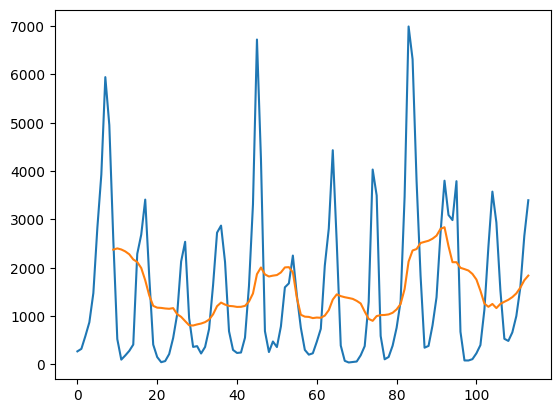

In [89]:
# 10년 단순이동평균
df['sma'] = df['value'].rolling(10).mean()

plt.plot(df['value'])
plt.plot(df['sma'])
plt.show()

**2. 지수가중이동평균(Exponetially-weighted Moving Average) : ewm(n).mean(), n=데이터개수**
<br>최근 데이터에 가중치 부여하여 이동평균 구함, 가중치는 지수함수형태로 사용

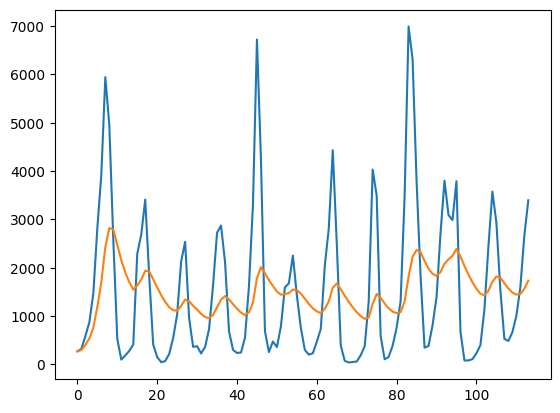

In [90]:
# 10년 지수가중이동평균
df['ewm'] = df['value'].ewm(10).mean()

plt.plot(df['value'])
plt.plot(df['ewm'])
plt.show()